<a href="https://colab.research.google.com/github/nikitosssobur/My-ML-Projects/blob/main/image_recognition(mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(np.shape(x_train))
x_train = x_train / 255
x_test = x_test / 255

(60000, 28, 28)


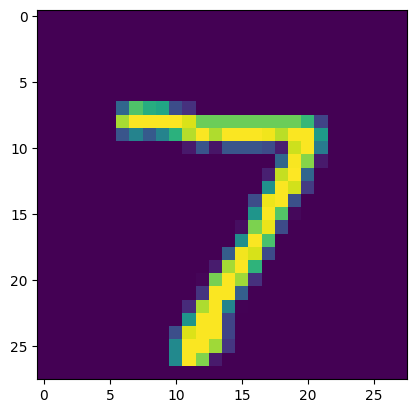

In [ ]:
plt.imshow(x_test[0])

In [ ]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)
x_train = np.expand_dims(x_train, axis = 3)
x_test = np.expand_dims(x_test, axis = 3)

In [ ]:
print(np.shape(x_train))
y_test_cat[0]

(60000, 28, 28, 1)


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
#Building model
model = Sequential([
    Flatten(input_shape = (28, 28, 1)),
    Dense(256, activation = 'relu'),
    Dense(120, input_dim = 256, activation = 'relu'),
    Dense(60, input_dim = 120, activation = 'relu'),
    Dense(10, input_dim = 60, activation = 'softmax')
])

In [ ]:
#Training model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train_cat, epochs = 5, batch_size = 32)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2104 - accuracy: 0.9372
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0894 - accuracy: 0.9728
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0637 - accuracy: 0.9797
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0484 - accuracy: 0.9844
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0409 - accuracy: 0.9871


In [ ]:
print(np.shape(np.expand_dims(x_test[0], axis = 2)))
np.shape(x_test.reshape(np.shape(x_test)[0], 28, 28, 1))

(28, 28, 1, 1)


(10000, 28, 28, 1)

In [ ]:
#Model evaluation
predictions = model.predict(x_test.reshape(np.shape(x_test)[0], 28, 28, 1))
predictions = np.array([np.argmax(pred) for pred in predictions])
predictions

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
#Accuracy of model prediction on test data
acc = accuracy_score(y_test, predictions)
print(f'Test accuracy: {acc}')

Test accuracy: 0.9762


In [ ]:
#Model details
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 120)               30840     
                                                                 
 dense_2 (Dense)             (None, 60)                7260      
                                                                 
 dense_3 (Dense)             (None, 10)                610       
                                                                 
Total params: 239670 (936.21 KB)
Trainable params: 239670 (936.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
conv1 = Conv2D(16, kernel_size = 3, strides = 1, data_format = 'channels_last',
               activation = 'relu', padding = 'same', input_shape = (28, 28, 1))

maxpool1 = MaxPooling2D((2, 2), strides = 2)
maxpool2 = MaxPooling2D((2, 2), strides = 2)
conv2 = Conv2D(16, kernel_size = 3, strides = 1, data_format = 'channels_last',
               activation = 'relu', padding = "valid", input_shape = (14, 14, 16))


In [ ]:
conv_model = Sequential([conv1, maxpool1, conv2, maxpool2, Flatten(),
                         Dense(144, activation = 'relu'), Dense(10, activation = 'softmax')])
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_4 (Dense)             (None, 144)              

In [ ]:
conv_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
conv_model.fit(x_train, y_train_cat, epochs = 5, batch_size = 32)

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1724 - accuracy: 0.9474
Epoch 2/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0542 - accuracy: 0.9832
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0369 - accuracy: 0.9884
Epoch 4/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0291 - accuracy: 0.9908
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0215 - accuracy: 0.9933


In [ ]:
conv_model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 2s 6ms/step - loss: 0.0339 - accuracy: 0.9896


[0.033879850059747696, 0.9896000027656555]